# Analisi tecnica in python con la libreria ta

https://technical-analysis-library-in-python.readthedocs.io/en/latest/#

``` $ pip install ta```
    

In [1]:
import ta

Importiamo dei dati :

In [34]:
import yfinance as yf
import pandas as pd
fca = yf.Ticker("FCA.MI")
df = fca.history( start="2020-01-01", end="2020-09-30")

In [26]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-08-03,8.64,9.07,8.56,9.03,12195853,0,0
2020-08-04,9.12,9.39,9.12,9.39,15775787,0,0
2020-08-05,9.42,9.54,9.31,9.40,9160412,0,0
2020-08-06,9.43,9.62,9.29,9.30,10789563,0,0
2020-08-07,9.23,9.32,9.14,9.28,7923526,0,0


In [35]:

# Initialize Bollinger Bands Indicator
indicator_bb = ta.volatility.BollingerBands(close=df["Close"], n=20, ndev=2)

# Add Bollinger Bands features
df['bb_bbm'] = indicator_bb.bollinger_mavg()
df['bb_bbh'] = indicator_bb.bollinger_hband()
df['bb_bbl'] = indicator_bb.bollinger_lband()

# Add Bollinger Band high indicator
df['bb_bbhi'] = indicator_bb.bollinger_hband_indicator()

# Add Bollinger Band low indicator
df['bb_bbli'] = indicator_bb.bollinger_lband_indicator()

In [29]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,bb_bbm,bb_bbh,bb_bbl,bb_bbhi,bb_bbli
Date,,,,,,,,,,,,
2020-09-23,10.39,10.66,10.30,10.39,14067010,0,0,9.8150,10.884308,8.745692,0.0,0.0
2020-09-24,10.26,10.61,10.19,10.37,9912951,0,0,9.8550,10.944321,8.765679,0.0,0.0
2020-09-25,10.45,10.48,10.05,10.23,8996798,0,0,9.8940,10.978369,8.809631,0.0,0.0
2020-09-28,10.38,10.67,10.38,10.64,14059790,0,0,9.9555,11.062378,8.848622,0.0,0.0
2020-09-29,10.63,10.63,10.33,10.39,7796651,0,0,10.0135,11.083178,8.943822,0.0,0.0


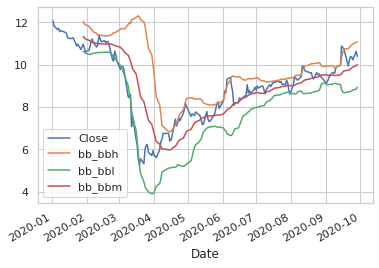

In [60]:
df.loc[:,['Close','bb_bbh','bb_bbl','bb_bbm']].plot()

In [48]:
indicator_RSI=ta.momentum.RSIIndicator(close=df['Close'],n=5,fillna=True)
df['RSI']=indicator_RSI.rsi()

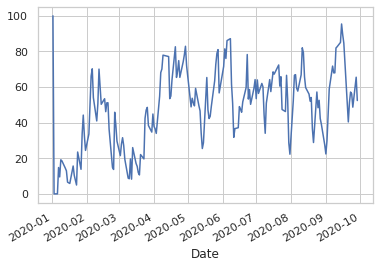

In [49]:
df['RSI'].plot()

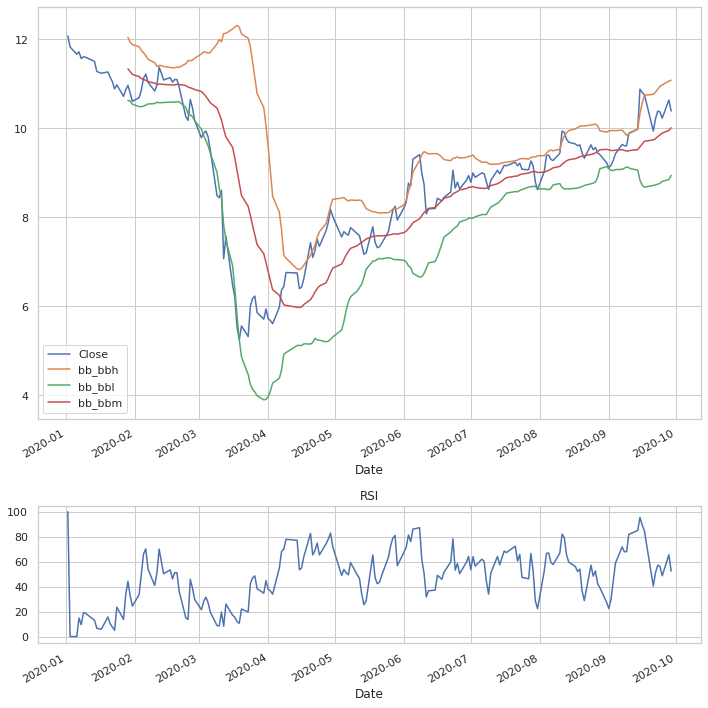

In [63]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(2,1,figsize=(10,10),gridspec_kw={'height_ratios': [3, 1]})
df.loc[:,['Close','bb_bbh','bb_bbl','bb_bbm']].plot(ax=ax[0])
#df['Close'].plot(ax=ax[0])
df['RSI'].plot(ax=ax[1])
ax[1].set_title('RSI')
fig.tight_layout()